In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import chi2_contingency, chisquare, fisher_exact

In [2]:
# Loading data from URLs
url_client_prof = 'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_demo.txt'
url_dig_fprint_1 = 'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_1.txt'
url_dig_fprint_2 = 'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_2.txt'
url_exp_rost = 'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_experiment_clients.txt'

In [3]:
# Reading data into DataFrames
client_prof = pd.read_csv(url_client_prof)
digital_fprint_1 = pd.read_csv(url_dig_fprint_1)
digital_fprint_2 = pd.read_csv(url_dig_fprint_2)
experiment_roster = pd.read_csv(url_exp_rost)

In [4]:
# Concatenating digital footprint data
digital_fprint = pd.concat([digital_fprint_1, digital_fprint_2], axis = 0)

In [5]:
# Checking for null values in each DataFrame
print("Client Profile Null Values:\n", client_prof.isnull().sum())
print("\nDigital Footprint Null Values:\n", digital_fprint.isnull().sum())
print("\nExperiment Roster Null Values:\n", experiment_roster.isnull().sum())   

Client Profile Null Values:
 client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

Digital Footprint Null Values:
 client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

Experiment Roster Null Values:
 client_id        0
Variation    20109
dtype: int64


In [6]:
client_prof.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [7]:
digital_fprint.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [8]:
# Rename columns for pattern
experiment_roster = experiment_roster.rename(columns={'client_id': 'client_id', 'Variation': 'variation'})

experiment_roster.head()

,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [9]:
# Dropping null values, aka removing clients not evaluated in the experiment
experiment_roster = experiment_roster.dropna()

In [10]:
# Checking for duplicates in each DataFrame
print("Client Profile Duplicates:", client_prof.duplicated().sum())
print("Digital Footprint Duplicates:", digital_fprint.duplicated().sum())   
print("Experiment Roster Duplicates:", experiment_roster.duplicated().sum())

Client Profile Duplicates: 0
Digital Footprint Duplicates: 10764
Experiment Roster Duplicates: 0


In [11]:
# Identifying duplicates in the digital footprint DataFrame
duplicates = digital_fprint[digital_fprint.duplicated()]

duplicates_count = (
    digital_fprint
    .groupby(digital_fprint.columns.tolist())  # agrupa por todas as colunas
    .size()
    .reset_index(name='count')  # cria uma coluna 'count'
    .sort_values('count', ascending=False)
)

duplicates_count.head(10)

# Removing duplicates from the digital footprint DataFrame
digital_fprint = digital_fprint.drop_duplicates()

In [12]:
# Merging DataFrames based on 'client_id' to study experiment results
new_table = pd.merge(digital_fprint, experiment_roster, on = 'client_id', how = 'inner')
new_table

,client_id,visitor_id,visit_id,process_step,date_time,variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
317230,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test
317231,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control
317232,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control
317233,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control


In [13]:
# Who are the primary clients using this online process?
# Let's analyze the 'logons_6_mnth' column in the client profile DataFrame, the column reflects the frequency with which 
# the client logged onto Vanguard's platform over the last six months.

average_age_by_logons = pd.crosstab(client_prof["logons_6_mnth"], columns="average_age", values=client_prof["clnt_age"], aggfunc='mean').round(0)
average_age_by_logons

col_0,average_age
logons_6_mnth,
1.0,43.0
2.0,43.0
3.0,45.0
4.0,46.0
5.0,47.0
6.0,48.0
7.0,47.0
8.0,49.0
9.0,47.0


C:\Users\DELL\AppData\Local\Temp\ipykernel_15692\864802599.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_age_by_logons.index, y=average_age_by_logons['average_age'], palette="BuGn")


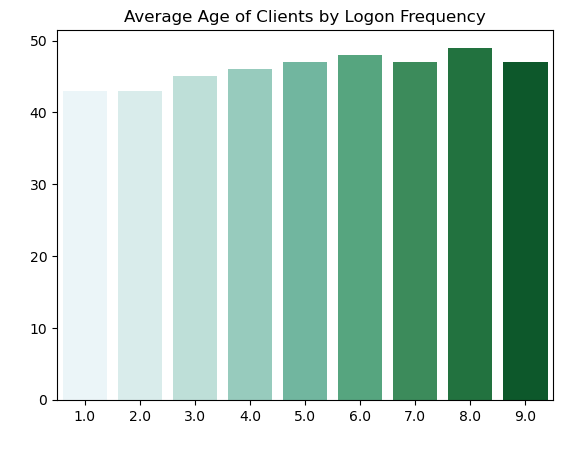

In [57]:
sns.barplot(x=average_age_by_logons.index, y=average_age_by_logons['average_age'], palette="BuGn")
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Average Age of Clients by Logon Frequency')
plt.show()

In [15]:
average_balance_by_logons = pd.crosstab(client_prof["logons_6_mnth"], columns="average_balance", values=client_prof["bal"], aggfunc='mean').round(0)
average_balance_by_logons

col_0,average_balance
logons_6_mnth,
1.0,71622.0
2.0,90056.0
3.0,92743.0
4.0,105059.0
5.0,123717.0
6.0,151000.0
7.0,187894.0
8.0,195061.0
9.0,224477.0


C:\Users\DELL\AppData\Local\Temp\ipykernel_15692\3853649418.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_balance_by_logons.index, y=average_balance_by_logons['average_balance'], palette="Blues")


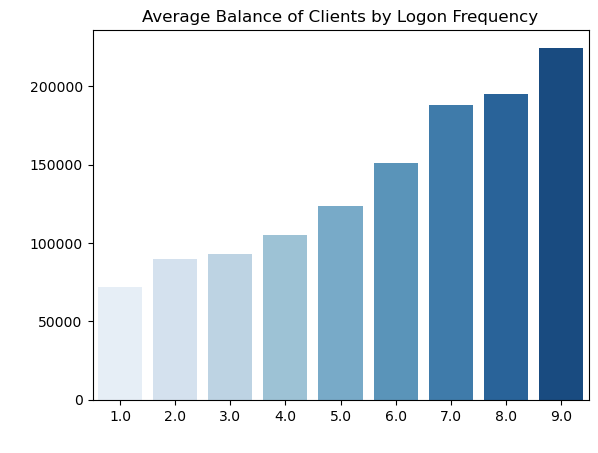

In [58]:
sns.barplot(x=average_balance_by_logons.index, y=average_balance_by_logons['average_balance'], palette="Blues")
plt.title('Average Balance of Clients by Logon Frequency')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()


In [17]:
average_tenure_by_logons = pd.crosstab(client_prof["logons_6_mnth"], columns="average_tenure", values=client_prof["clnt_tenure_yr"], aggfunc='mean').round(1)
average_tenure_by_logons

col_0,average_tenure
logons_6_mnth,
1.0,11.5
2.0,11.6
3.0,11.6
4.0,11.7
5.0,12.0
6.0,12.3
7.0,12.4
8.0,12.7
9.0,12.3


C:\Users\DELL\AppData\Local\Temp\ipykernel_15692\202652921.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_tenure_by_logons.index, y=average_tenure_by_logons['average_tenure'], palette="BuPu")


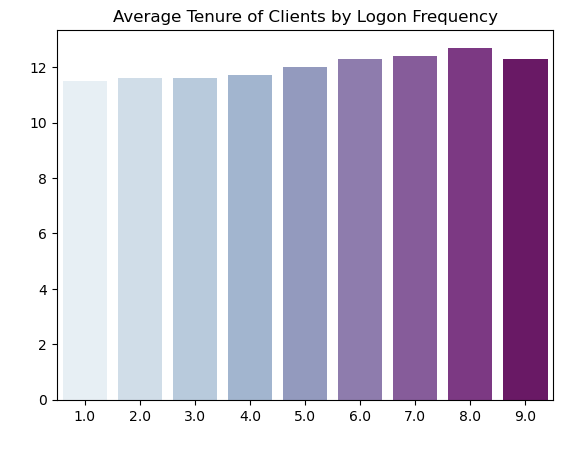

In [59]:
sns.barplot(x=average_tenure_by_logons.index, y=average_tenure_by_logons['average_tenure'], palette="BuPu")
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Average Tenure of Clients by Logon Frequency')
plt.show()


In [19]:
gender_by_logons = pd.crosstab(client_prof["logons_6_mnth"], client_prof["gendr"])
gender_by_logons

gendr,F,M,U,X
logons_6_mnth,,,,
1.0,1119,798,1021,0
2.0,1040,911,1058,0
3.0,3782,2885,3576,0
4.0,3536,3050,3633,1
5.0,3222,2852,3179,1
6.0,2585,2643,2650,0
7.0,2910,3667,3316,0
8.0,1386,1893,1531,0
9.0,3166,5025,4158,1


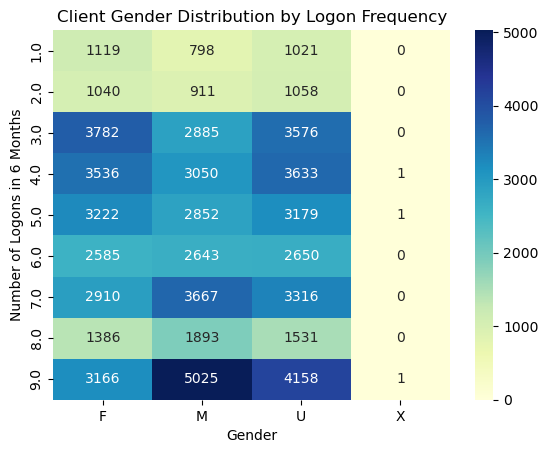

In [20]:
sns.heatmap(gender_by_logons, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Client Gender Distribution by Logon Frequency')
plt.xlabel('Gender')
plt.ylabel('Number of Logons in 6 Months')
plt.show()

# There're too many U (unknown) entries to be conclusive.

In [21]:
# With these results, we can see that clients who log on more frequently tend to have higher balances, but in terms of age and tenure,
# the number of logons does not significantly affect the average age and the and longer tenures with Vanguard. So let's focus on
# clients that log on frequently.

top_clients = client_prof['logons_6_mnth'].quantile(0.9) # Selecting clients in the top 10% of logon frequency
primary_clients = client_prof[client_prof['logons_6_mnth'] >= top_clients]
primary_clients

# 12350 is exactly the number of clients that logon 9 times in the last six months.

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
9,8198645,15.0,189.0,54.5,F,2.0,382303.83,6.0,9.0
11,2537139,8.0,99.0,51.5,U,2.0,135940.68,6.0,9.0
...,...,...,...,...,...,...,...,...,...
50485,3823121,14.0,178.0,68.5,F,2.0,32666.22,6.0,9.0
50489,6751438,8.0,98.0,49.5,U,2.0,416988.75,6.0,9.0
50493,9932367,23.0,280.0,57.0,F,2.0,94466.55,6.0,9.0
50495,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0


In [22]:
# Are the primary clients younger or older, new or long-standing?
# In general, primary clients tend to be relatively older and have a marginally longer tenure with Vanguard compared to
# the overall client base. And also, they have significantly higher average balances, but this seems to be skewed due to 
# a few outliers with extremely high balances.

median_primary_clients = primary_clients[['clnt_age', 'clnt_tenure_yr', 'bal']].median().round(1)
mean_primary_clients = primary_clients[['clnt_age', 'clnt_tenure_yr', 'bal']].mean().round(1)
median_primary_clients, mean_primary_clients

(clnt_age             48.0
 clnt_tenure_yr       11.0
 bal               93156.4
 dtype: float64,
 clnt_age              47.5
 clnt_tenure_yr        12.3
 bal               224476.9
 dtype: float64)

In [23]:
# KPI

# Completion Rate: The proportion of users who reach the final 'confirm' step.
# Time Spent on Each Step: The average duration users spend on each step.
# Error Rates: If there's a step where users go back to a previous step, it may indicate confusion or an error. 
# You should consider moving from a later step to an earlier one as an error.

In [24]:
# To calculate the completion rate, we need to identify the visits that begin the 'start' step and reach the 'confirm' step in 
# the process.

start_visits = new_table[new_table['process_step'] == 'start']['visit_id'].nunique()
confirm_visits = new_table[new_table['process_step'] == 'confirm']['visit_id'].nunique()
completion_rate = (confirm_visits / start_visits) * 100
completion_rate

# It only shows the % of users that completed the process among those who started it. 

58.92011070976216

In [25]:
# Let's make a pivot table to see the completion rate by variation.
completion_by_variation = new_table.pivot_table(
    index='variation',
    values='visit_id',
    aggfunc=lambda x: (x[new_table['process_step'] == 'confirm'].nunique() / x[new_table['process_step'] == 'start'].nunique()) * 100
).rename(columns={'visit_id': 'completion_rate'})
completion_by_variation

,completion_rate
variation,
Control,51.912003
Test,65.539705


C:\Users\DELL\AppData\Local\Temp\ipykernel_15692\2375513607.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=completion_by_variation.index, y=completion_by_variation['completion_rate'], palette="Set2")


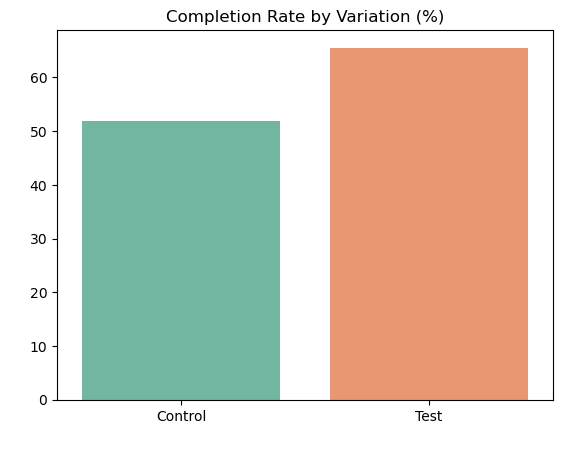

In [62]:
sns.barplot(x=completion_by_variation.index, y=completion_by_variation['completion_rate'], palette="Set2")
plt.title('Completion Rate by Variation (%)')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

In [27]:
# Let's use the diff method to calculate the time spent on each step for every client.
# First, we need to map the process steps to numerical values for easier calculation.
step_map = {'start': 0, 'step_1': 1, 'step_2': 2, 'step_3': 3, 'confirm': 4}
new_table['step_number'] = new_table['process_step'].map(step_map)

# Now, we need to sort the table by visit_id and time to ensure the diff calculation is accurate.
new_table = new_table.sort_values(by=['visit_id', 'date_time'], ascending=True)

In [28]:
# Now, we can calculate the time spent on each step for every client.
new_table['date_time'] = pd.to_datetime(new_table['date_time'])
new_table['time_spent'] = new_table.groupby('visit_id')['date_time'].diff().dt.total_seconds()
new_table

,client_id,visitor_id,visit_id,process_step,date_time,variation,step_number,time_spent
106314,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,Test,4,NaN
106313,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,Test,4,52.0
235345,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,Test,0,NaN
235344,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,Test,1,16.0
235343,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,Test,2,9.0
...,...,...,...,...,...,...,...,...
95173,6627522,730634087_44272418812,999988789_76411676596_272843,start,2017-04-21 23:49:11,Test,0,NaN
95172,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:49:22,Test,1,11.0
95171,6627522,730634087_44272418812,999988789_76411676596_272843,step_2,2017-04-21 23:50:16,Test,2,54.0
95170,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:51:00,Test,1,44.0


In [29]:
# What's the average time spent?
average_time_spent_total = new_table['time_spent'].mean()
average_time_spent_total

# What's the average time spent on each step?
average_time_spent = new_table.groupby('process_step')['time_spent'].mean()

average_time_spent_total, average_time_spent

(np.float64(84.20793855581987),
 process_step
 confirm    129.751276
 start      162.378698
 step_1      40.114027
 step_2      43.979428
 step_3      95.863664
 Name: time_spent, dtype: float64)

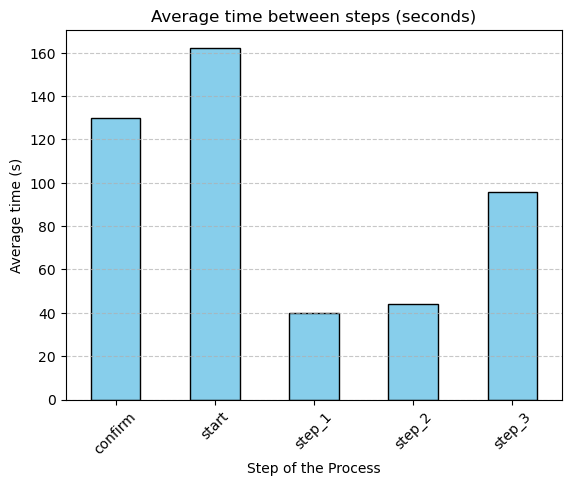

In [30]:
average_time_spent.plot(kind='bar', color="skyblue", edgecolor='black')

plt.title('Average time between steps (seconds)')
plt.xlabel('Step of the Process')
plt.ylabel('Average time (s)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [31]:
# Now, let's make a pivot table to see the average time spent on each step grouped by 'variation'.
average_time_spent = new_table.pivot_table(
    index='process_step',
    columns='variation',
    values='time_spent',
    aggfunc='mean'
)

average_time_spent

variation,Control,Test
process_step,,
confirm,129.976828,129.583041
start,177.226089,152.885005
step_1,43.180970,37.773991
step_2,38.838146,48.272585
step_3,94.159651,97.356255


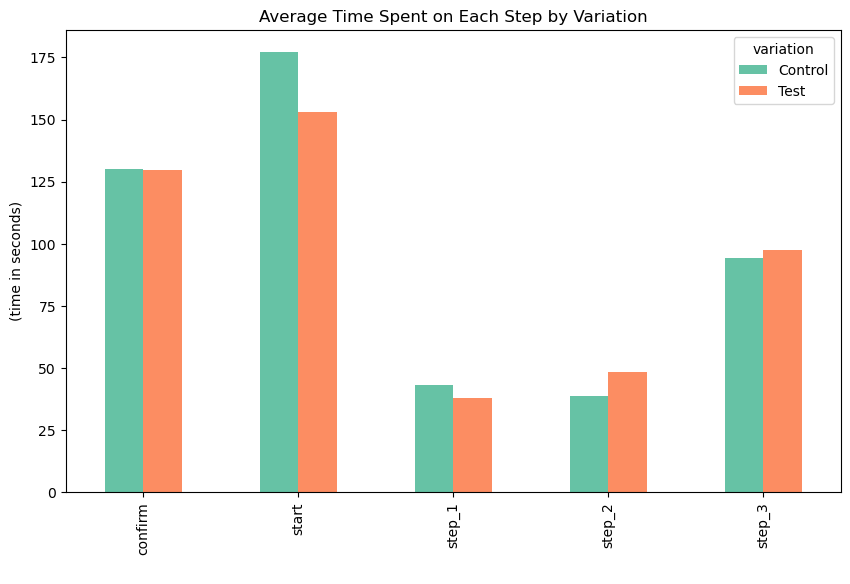

In [67]:
# Let's visualize the average time spent on each step.
average_time_spent.plot(kind='bar', figsize=(10,6))
plt.title('Average Time Spent on Each Step by Variation')
plt.xlabel(' ')
plt.ylabel('(time in seconds)')
plt.show()

In [33]:
# Finally, let's calculate the error by identifying instances where users move back to a previous step.
new_table['step_diff'] = new_table.groupby('visit_id')['step_number'].diff()
new_table['is_error'] = new_table['step_diff'] < 0

# With that, we can calculate the error rate by event occurrences.
error_rate = new_table['is_error'].mean() * 100

# And also, we can calculate the error rate by unique visits.
error_rate_per_visitid = new_table.groupby('visit_id')['is_error'].max().mean() * 100

error_rate, error_rate_per_visitid

(np.float64(8.208425930304033), np.float64(24.014160826529878))

In [34]:
# Let's make a pivot table to see the error rate by variation.
error_rate_by_variation = new_table.pivot_table(
    index='variation',
    values='is_error',
    aggfunc='mean'
) * 100
error_rate_by_variation

,is_error
variation,
Control,6.902146
Test,9.247364


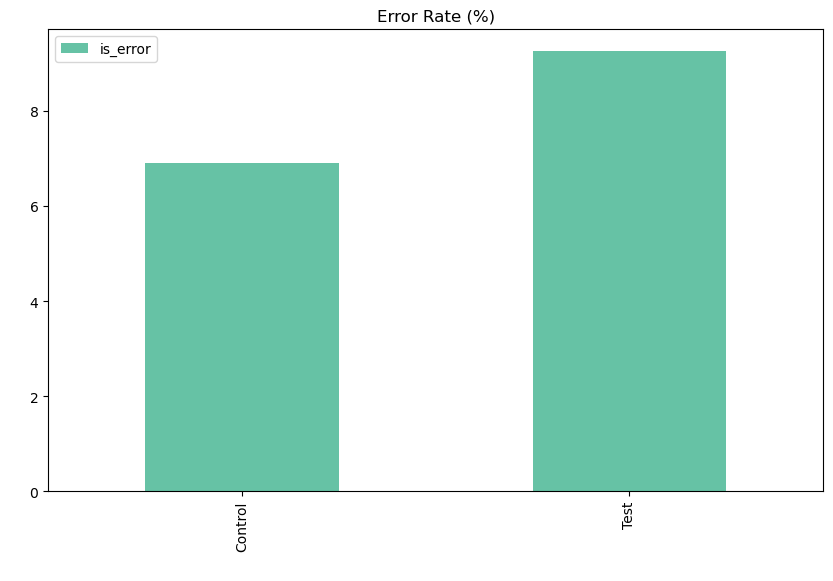

In [76]:
colors = sns.color_palette("Set2", n_colors=2)
error_rate_by_variation.plot(kind='bar', figsize=(10,6), color=colors)
plt.title('Error Rate (%)')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

In [36]:
# Let's make a pivot table to see the error rate per 'visit id' by variation.

# Step 1: one record per visit 
visit_error = new_table.groupby(['visit_id', 'variation'])['is_error'].max().reset_index()

# Step 2: average by variation
error_rate_per_variation = visit_error.groupby('variation')['is_error'].mean() * 100

error_rate_per_variation

variation
Control    20.525645
Test       27.030375
Name: is_error, dtype: float64

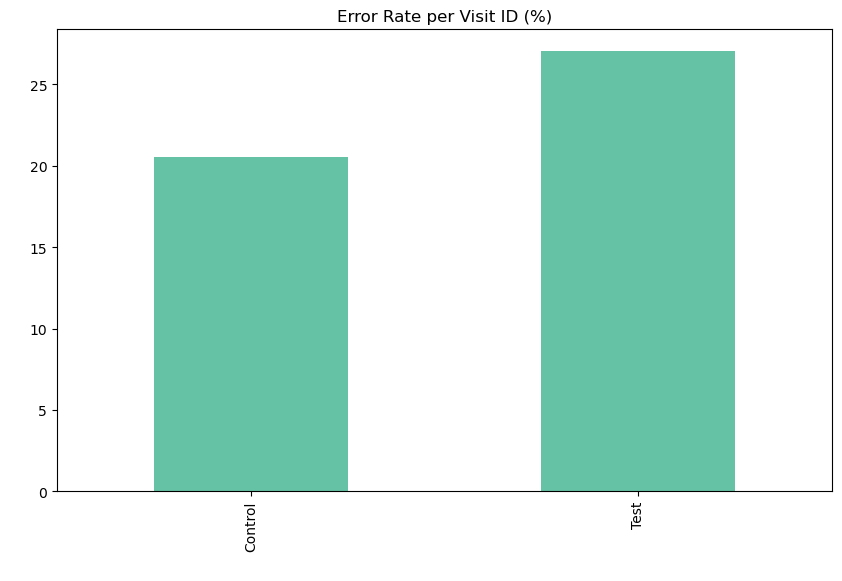

In [78]:
error_rate_per_variation.plot(kind='bar', figsize=(10,6))
plt.title('Error Rate per Visit ID (%)')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

In [38]:
# Error rate by step
error_by_step = (
    new_table.groupby('process_step')['is_error']
    .mean()
    .fillna(0) * 100
)

error_by_step

process_step
confirm     0.000000
start      15.375718
step_1      8.381469
step_2      8.199816
step_3      0.254848
Name: is_error, dtype: float64

C:\Users\DELL\AppData\Local\Temp\ipykernel_15692\1661681924.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


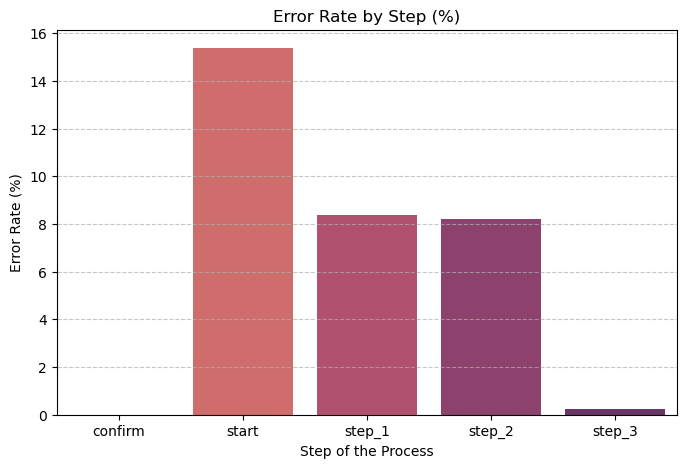

In [39]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=error_by_step.index,
    y=error_by_step.values,
    palette='flare'
)

plt.title('Error Rate by Step (%)')
plt.xlabel('Step of the Process')
plt.ylabel('Error Rate (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [40]:
# Let's group this result by 'variation' to see the difference between the control and test groups.

error_by_variation = (
    new_table.groupby(['process_step', 'variation'])['is_error']
    .mean()
    .unstack()
) * 100
error_by_variation


variation,Control,Test
process_step,,
confirm,0.000000,0.000000
start,10.868224,19.043265
step_1,7.795153,8.829463
step_2,9.172390,7.388589
step_3,0.448829,0.085400


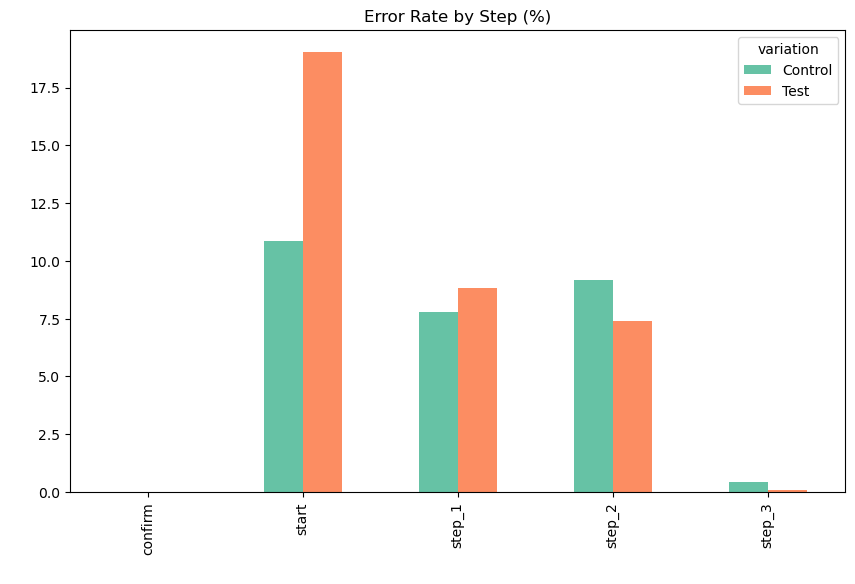

In [80]:
error_by_variation.plot(kind='bar', figsize=(10,6))
plt.title('Error Rate by Step (%)')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

In [42]:
# Splitting the tables based on 'Variation' column

var_tables = {}
for var in new_table['variation'].unique():
    var_tables[var] = new_table[new_table['variation'] ==var]

test_table = var_tables['Test']
control_table = var_tables['Control']

In [43]:
# To calculate the completion rate, we need to identify the visits that begin the 'start' step and reach the 'confirm' step in 
# the process.

# Test Group
start_visits_test = test_table[test_table['process_step'] == 'start']['visit_id'].nunique()
confirm_visits_test = test_table[test_table['process_step'] == 'confirm']['visit_id'].nunique()
completion_rate_test = (confirm_visits_test / start_visits_test) * 100

# Control Group
start_visits_control = control_table[control_table['process_step'] == 'start']['visit_id'].nunique()
confirm_visits_control = control_table[control_table['process_step'] == 'confirm']['visit_id'].nunique()
completion_rate_control = (confirm_visits_control / start_visits_control) * 100

completion_rate_test, completion_rate_control
# It only shows the % of users that completed the process among those who started it. 

(65.53970503965981, 51.91200258815917)

In [44]:
# What's the average time spent?
# Test Group
average_time_spent_test_total = test_table['time_spent'].mean()
# Control Group
average_time_spent_control_total = control_table['time_spent'].mean()

# What's the average time spent on each step?
# Test Group
average_time_spent_test = test_table.groupby('process_step')['time_spent'].mean()
# Control Group
average_time_spent_control = control_table.groupby('process_step')['time_spent'].mean()

average_time_spent_test_total, average_time_spent_control_total, average_time_spent_test, average_time_spent_control

(np.float64(84.39527554543241),
 np.float64(83.96669310802834),
 process_step
 confirm    129.583041
 start      152.885005
 step_1      37.773991
 step_2      48.272585
 step_3      97.356255
 Name: time_spent, dtype: float64,
 process_step
 confirm    129.976828
 start      177.226089
 step_1      43.180970
 step_2      38.838146
 step_3      94.159651
 Name: time_spent, dtype: float64)

In [45]:
# Calculating the error rates

# Test Group
error_rate_test = test_table['is_error'].mean() * 100
error_rate_per_visitid_test = test_table.groupby('visit_id')['is_error'].max().mean() * 100

# Control Group
error_rate_control = control_table['is_error'].mean() * 100
error_rate_per_visitid_control = control_table.groupby('visit_id')['is_error'].max().mean() * 100

error_rate_test, error_rate_per_visitid_test, error_rate_control, error_rate_per_visitid_control

(np.float64(9.247364161653433),
 np.float64(27.030374838431708),
 np.float64(6.902146069334547),
 np.float64(20.525645406815993))

In [46]:
# Error rate by step

# Test Group
error_by_step_test = (
    test_table.groupby('process_step')['is_error']
    .mean()
    .fillna(0) * 100
)
# Control Group
error_by_step_control = (
    control_table.groupby('process_step')['is_error']
    .mean()
    .fillna(0) * 100
)

error_by_step_test, error_by_step_control

(process_step
 confirm     0.000000
 start      19.043265
 step_1      8.829463
 step_2      7.388589
 step_3      0.085400
 Name: is_error, dtype: float64,
 process_step
 confirm     0.000000
 start      10.868224
 step_1      7.795153
 step_2      9.172390
 step_3      0.448829
 Name: is_error, dtype: float64)

In [47]:
# Hypothesis Testing

# H0: There is no difference in completion rates between the control and test groups.
# H1: There is a significant difference in completion rates between the control and test groups.

# Chi-Squared Test
contingency_table = np.array([
    [confirm_visits_control, start_visits_control - confirm_visits_control],
    [confirm_visits_test, start_visits_test - confirm_visits_test]
])

chi2, p_value, _, _ = chi2_contingency(contingency_table)
chi2, p_value

# Result Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in completion rates between the control and test groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in completion rates between the control and test groups.")

Reject the null hypothesis: There is a significant difference in completion rates between the control and test groups.


In [48]:
#HO: The error rate of the control group equals the error rate of the test group.
#H1: The error rate of the control group is not equal to the error rate of the test group.

# Chi-Squared Test

# Aggregate per visit
control_visits = control_table.groupby('visit_id')['is_error'].max()
test_visits = test_table.groupby('visit_id')['is_error'].max()

# Counts
error_control = control_visits.sum()                # number of visits with at least one error
noerror_control = len(control_visits) - error_control
error_test = test_visits.sum()
noerror_test = len(test_visits) - error_test

contingency_table_error = np.array([
    [error_control, noerror_control],
    [error_test, noerror_test]
])

# Chi-squared test
chi2_error, p_value_error, _, _ = chi2_contingency(contingency_table_error)

print("Chi²:", chi2_error)
print("p-value:", p_value_error)

alpha = 0.05
if p_value_error < alpha:
    print("Reject H₀: Significant difference in error rates.")
else:
    print("Fail to reject H₀: No significant difference in error rates.")

error_rate_control = error_control / len(control_visits) * 100
error_rate_test = error_test / len(test_visits) * 100
print(f"Control error rate: {error_rate_control:.2f}%")
print(f"Test error rate: {error_rate_test:.2f}%")


Chi²: 399.5159301777709
p-value: 7.019573483465867e-89
Reject H₀: Significant difference in error rates.
Control error rate: 20.53%
Test error rate: 27.03%


In [49]:
#HO: The error rate of the control group equals the error rate of the test group (per step)
#H1: The error rate of the control group is not equal to the error rate of the test group (per step).

# Chi-Squared Test per step

alpha = 0.05

for step in new_table['process_step'].unique():
    control_step = control_table[control_table['process_step'] == step]['is_error']
    test_step = test_table[test_table['process_step'] == step]['is_error']
    
    # counts
    err_control = control_step.sum()
    noerr_control = len(control_step) - err_control
    err_test = test_step.sum()
    noerr_test = len(test_step) - err_test
    
    contingency = np.array([
        [err_control, noerr_control],
        [err_test, noerr_test]
    ])
    
    if contingency.sum() == 0 or np.any(np.isnan(contingency)):
        print(f"Step: {step} — skipped (no errors or missing values).")
        continue

    try:
        expected = chi2_contingency(contingency, correction=False)[3]
        if (expected < 5).any():
            stat, p_value = fisher_exact(contingency)
            test_used = "Fisher"
        else:
            stat, p_value, _, _ = chi2_contingency(contingency)
            test_used = "Chi²"
    except ValueError:
        # fallback in case chi2_contingency fails
        stat, p_value = fisher_exact(contingency)
        test_used = "Fisher"
    
    print(f"\nStep: {step}")
    print(f"Test used: {test_used}")
    print(f"p-value: {p_value:.4f}")
    if p_value < alpha:
        print("→ Reject H₀: Significant difference in error rates.")
    else:
        print("→ Fail to reject H₀: No significant difference in error rates.")


Step: confirm
Test used: Fisher
p-value: 1.0000
→ Fail to reject H₀: No significant difference in error rates.

Step: start
Test used: Chi²
p-value: 0.0000
→ Reject H₀: Significant difference in error rates.

Step: step_1
Test used: Chi²
p-value: 0.0000
→ Reject H₀: Significant difference in error rates.

Step: step_2
Test used: Chi²
p-value: 0.0000
→ Reject H₀: Significant difference in error rates.

Step: step_3
Test used: Chi²
p-value: 0.0000
→ Reject H₀: Significant difference in error rates.


In [50]:
#HO: The average time spent is the same for both groups.
#H1: The average time spent differs between the two groups.

# T-Test
time_control = control_table['time_spent'].dropna()
time_test = test_table['time_spent'].dropna()
t_stat, p_value_time = st.ttest_ind(time_control, time_test, equal_var=False)
t_stat, p_value_time
if p_value_time < alpha:
    print("Reject H₀: Significant difference in average time spent.")
else:
    print("Fail to reject H₀: No significant difference in average time spent.")    


Fail to reject H₀: No significant difference in average time spent.


In [51]:
#HO: The average time spent on each step is the same for both groups.
#H1: The average time spent on each step differs between the two groups.

alpha = 0.05

for step in new_table['process_step'].unique():
    control_step_time = control_table[control_table['process_step'] == step]['time_spent'].dropna()
    test_step_time = test_table[test_table['process_step'] == step]['time_spent'].dropna()
    
    # Check normality
    stat_control, p_control = st.shapiro(control_step_time)
    stat_test, p_test = st.shapiro(test_step_time)
    
    normal_control = p_control > alpha
    normal_test = p_test > alpha
    
    print(f"\nStep: {step}")
    print(f"Shapiro-Wilk p-values — Control: {p_control:.4f}, Test: {p_test:.4f}")
    
    if normal_control and normal_test:
        # Both groups are normally distributed, use t-test
        stat, p_value = st.ttest_ind(control_step_time, test_step_time, equal_var=False)
        test_used = "t-test"
    else:
        # Use Mann-Whitney U test
        stat, p_value = st.mannwhitneyu(control_step_time, test_step_time, alternative='two-sided')
        test_used = "Mann-Whitney U"
    
    print(f"Test used: {test_used}")
    print(f"p-value: {p_value:.4f}")
    
    if p_value < alpha:
        print("→ Reject H₀: Significant difference in average time spent.")
    else:
        print("→ Fail to reject H₀: No significant difference in average time spent.")


Step: confirm
Shapiro-Wilk p-values — Control: 0.0000, Test: 0.0000
Test used: Mann-Whitney U
p-value: 0.0000
→ Reject H₀: Significant difference in average time spent.

Step: start
Shapiro-Wilk p-values — Control: 0.0000, Test: 0.0000
Test used: Mann-Whitney U
p-value: 0.0000
→ Reject H₀: Significant difference in average time spent.

Step: step_1
Shapiro-Wilk p-values — Control: 0.0000, Test: 0.0000
Test used: Mann-Whitney U
p-value: 0.0000
→ Reject H₀: Significant difference in average time spent.

Step: step_2
Shapiro-Wilk p-values — Control: 0.0000, Test: 0.0000
Test used: Mann-Whitney U
p-value: 0.0000
→ Reject H₀: Significant difference in average time spent.

Step: step_3
Shapiro-Wilk p-values — Control: 0.0000, Test: 0.0000
Test used: Mann-Whitney U
p-value: 0.0024
→ Reject H₀: Significant difference in average time spent.


c:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16572.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 22218.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14596.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 22827.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarni